### **test**

In [ ]:
import gzip
import json
from datetime import datetime
from collections import defaultdict
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer

# def filter_2017_data(file_path):
#     data_2017 = []
#     with gzip.open(file_path, 'r') as f:
#         for line in f:
#             entry = json.loads(line)
#             review_date = entry.get('review_date')
#             if review_date:
#                 try:
#                     date = datetime.strptime(review_date, "%B %d, %Y")
#                     if date.year == 2017 & date.year == 2016:
#                         data_2017.append(entry)
#                 except ValueError:
#                     continue
#     return data_2017

def load_data(file_path):
    dataset = []
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        for line in f:
            dataset.append(json.loads(line))
    return dataset


In [ ]:
# def classify_rating(rating):
#     rating = int(rating)
#     if rating >= 8:
#         return 'high'
#     elif 6 <= rating <= 7:
#         return 'medium'
#     else:
#         return 'low'

In [ ]:
# # 提取特征和标签
# def prepare_data(data):
#     sia = SentimentIntensityAnalyzer()
#     user_history = defaultdict(list)  # 保存用户历史购买的 item_id
#     features = []
#     labels = []
    
#     for entry in data:
#         user_id = entry.get('user_id')
#         item_id = entry.get('item_id')
#         review_text = entry.get('review_text', "")
#         rating = entry.get('rating')
        
#         if user_id and item_id and rating:
#             sentiment_score = sia.polarity_scores(review_text)['compound']
#             features.append({
#                 'user_id': user_id,
#                 'item_id': item_id,
#                 'sentiment_score': sentiment_score,
#                 'user_history': user_history[user_id][:]  # 用户历史购买记录
#             })
#             labels.append(classify_rating(rating))
#             user_history[user_id].append(item_id)
    
#     return features, labels

In [ ]:
# def calculate_similarity(item_id, user_history, item_data):
#     if not user_history:
#         return 0  # 没有历史记录，返回 0

#     vectorizer = TfidfVectorizer(max_features=500)
#     item_texts = [item_data[item]['review_text'] for item in user_history if item in item_data]
#     target_text = item_data[item_id]['review_text']
    
#     if not item_texts:  # 如果没有商品描述，返回 0
#         return 0

#     tfidf_matrix = vectorizer.fit_transform(item_texts + [target_text])
#     similarity_scores = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
#     return np.mean(similarity_scores)

In [ ]:
# # 数据划分
# def split_data(features, labels, test_size=0.2, random_seed=42):
#     random.seed(random_seed)
#     data = list(zip(features, labels))
#     random.shuffle(data)
#     split_index = int(len(data) * (1 - test_size))
#     train_data = data[:split_index]
#     test_data = data[split_index:]
#     return train_data, test_data

In [ ]:
# # 推荐分数计算
# def calculate_recommend_score(sentiment_score, similarity_score, w1, w2):
#     return w1 * sentiment_score + w2 * similarity_score

In [ ]:
# # 评估权重
# def evaluate_weights(data, w1, w2, threshold=0.5):
#     y_true = []
#     y_pred = []
#     for feature, label in data:
#         sentiment_score = feature['sentiment_score']
#         similarity_score = calculate_similarity(
#             feature['item_id'], feature['user_history'], item_data
#         )
#         score = calculate_recommend_score(sentiment_score, similarity_score, w1, w2)
#         predicted_label = 'high' if score >= threshold else 'medium' if 0.5 > score >= 0.2 else 'low'
#         y_true.append(label)
#         y_pred.append(predicted_label)
#     return accuracy_score(y_true, y_pred)

In [ ]:
# # 网格搜索优化权重
# def optimize_weights(train_data, item_data):
#     best_w1, best_w2, best_accuracy = 0, 0, 0
#     for w1 in np.linspace(0.1, 0.9, 11):
#         w2 = 1 - w1
#         accuracy = evaluate_weights(train_data, w1, w2)
#         if accuracy > best_accuracy:
#             best_w1, best_w2, best_accuracy = w1, w2, accuracy
#     return best_w1, best_w2, best_accuracy

In [ ]:
# # 最终推荐系统
# def final_recommendation(features, w1, w2):
#     recommendations = defaultdict(list)
#     for feature in features:
#         user_id = feature['user_id']
#         item_id = feature['item_id']
#         sentiment_score = feature['sentiment_score']
#         similarity_score = calculate_similarity(item_id, feature['user_history'], item_data)
#         score = calculate_recommend_score(sentiment_score, similarity_score, w1, w2)
#         recommendations[user_id].append((item_id, score))
#     for user_id in recommendations:
#         recommendations[user_id] = sorted(recommendations[user_id], key=lambda x: x[1], reverse=True)
#     return recommendations

In [ ]:
# # 加载数据并处理
# data = load_data("renttherunway_final_data.json.gz")
# item_data = {entry['item_id']: entry for entry in data}
# features, labels = prepare_data(data)

# # 数据划分
# train_data, val_data = split_data(features, labels)

# # 权重优化
# best_w1, best_w2, best_accuracy = optimize_weights(train_data, item_data)
# print(f"最佳权重: w1={best_w1}, w2={best_w2}, 准确率={best_accuracy}")

# # 验证集评估
# validation_accuracy = evaluate_weights(val_data, best_w1, best_w2)
# print(f"验证集准确率: {validation_accuracy}")

# # 最终推荐结果
# final_recommendations = final_recommendation(features, best_w1, best_w2)
# for user_id, items in list(final_recommendations.items())[:5]:  # 打印前 5 个用户的推荐
#     print(f"User {user_id} recommendations: {items[:5]}")

最佳权重: w1=0.9, w2=0.09999999999999998, 准确率=0.8320571024037307
验证集准确率: 0.8366975813784324
User 420272 recommendations: [('2363191', np.float64(0.8584425147412257)), ('2260466', np.float64(0.85077)), ('1083818', np.float64(0.7938000000000001)), ('2431951', np.float64(0.6693555568923641)), ('2340996', np.float64(0.4531334872506534))]
User 273551 recommendations: [('153475', np.float64(0.8091900000000001))]
User 360448 recommendations: [('1063761', np.float64(0.83997))]
User 909926 recommendations: [('126335', np.float64(0.86031))]
User 151944 recommendations: [('1187427', np.float64(0.852040621328063)), ('1746190', np.float64(0.8137634177461996)), ('466944', np.float64(0.7906479429306037)), ('2376757', np.float64(0.7804164692459005)), ('524341', np.float64(0.7787658469137425))]


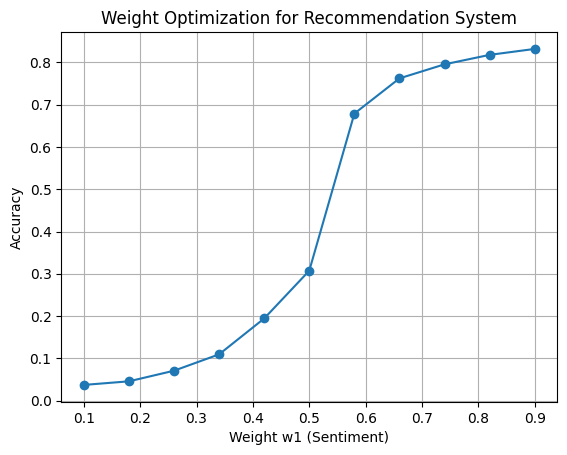

In [ ]:
# import matplotlib.pyplot as plt

# accuracies = []
# weights = np.linspace(0.1, 0.9, 11)
# for w1 in weights:
#     w2 = 1 - w1
#     accuracy = evaluate_weights(train_data, w1, w2)
#     accuracies.append(accuracy)

# plt.plot(weights, accuracies, marker='o')
# plt.xlabel("Weight w1 (Sentiment)")
# plt.ylabel("Accuracy")
# plt.title("Weight Optimization for Recommendation System")
# plt.grid()
# plt.show()

/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_20566/1415029742.py:30: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


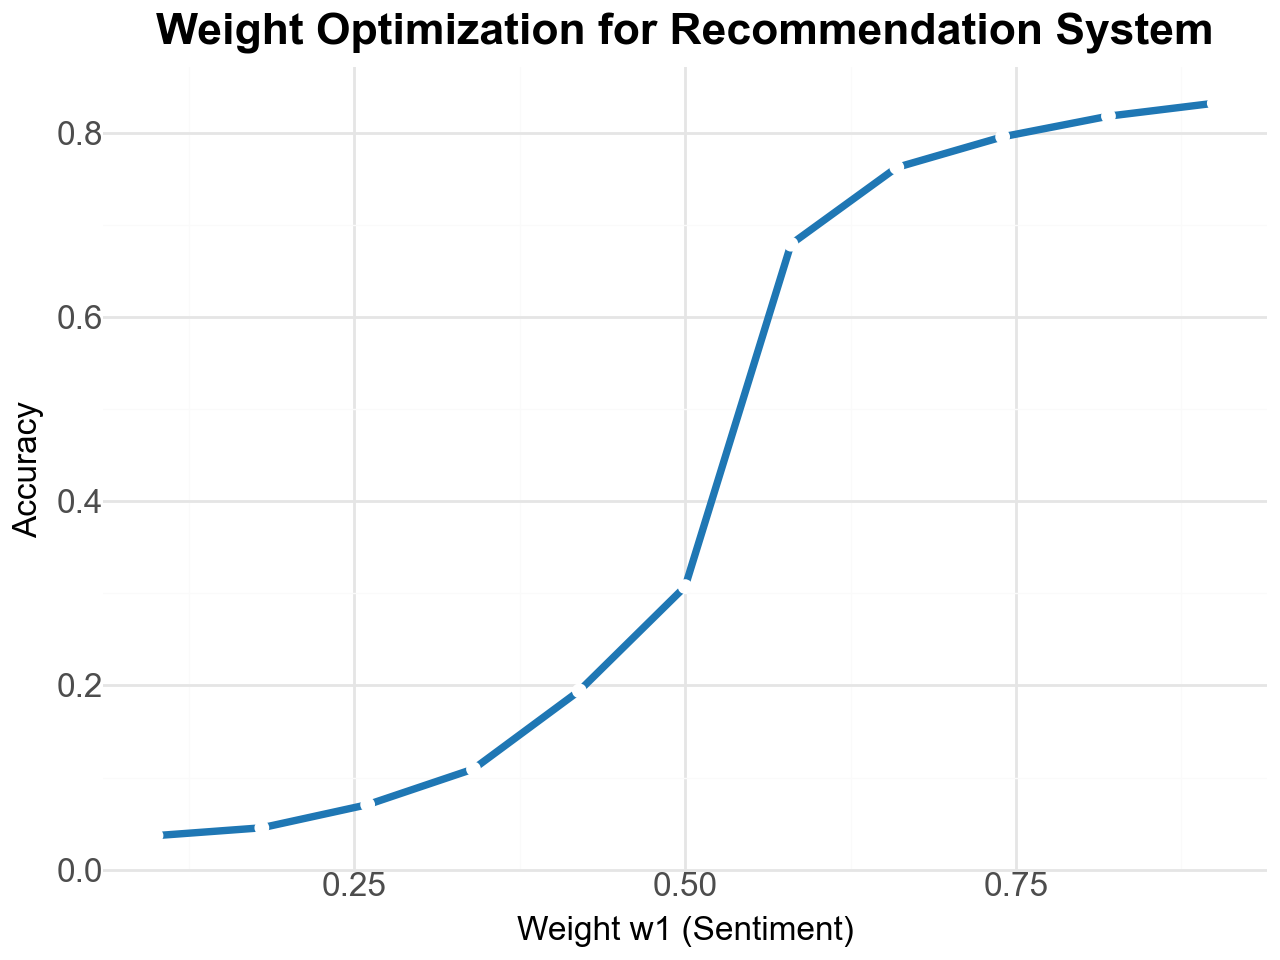

In [ ]:
# from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, theme, element_text
# import pandas as pd

# data = pd.DataFrame({
#     'Weight_w1': weights,
#     'Accuracy': accuracies
# })

# # 使用 plotnine 创建美化的图表
# plot = (
#     ggplot(data, aes(x='Weight_w1', y='Accuracy')) +
#     geom_line(color="#1f77b4", size=1.5) +  # 设置线的颜色和宽度
#     geom_point(color="white", size=2) +   # 设置点的颜色和大小
#     labs(
#         title="Weight Optimization for Recommendation System",
#         x="Weight w1 (Sentiment)",
#         y="Accuracy"
#     ) +
#     theme_minimal() +  # 使用简洁主题
#     theme(
#         text=element_text(family="Arial", size=12),  # 设置全局字体和大小
#         plot_title=element_text(size=16, weight="bold", ha="center"),  # 标题样式
#         axis_title=element_text(size=12),  # 坐标轴标题样式
#         axis_text=element_text(size=12),  # 坐标轴刻度文字样式
#         legend_position="none"  # 如果没有图例，隐藏图例
#     )
# )

# # 显示图表
# print(plot)

In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
from wordcloud import WordCloud
from collections import Counter
import numpy as np
stop_words=set(stopwords.words("english"))

In [2]:
# functions for cleaning
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

def process_raw_text(text):    
    # Tokenize words
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase, lemmatize and remove stopwords
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens]
    lemmas = [token.lower() for token in lemmas]    
    
    clean = [lemma for lemma in lemmas if lemma not in stop_words]
    return clean

def frequent_ngram(corpus, ngram, n=30):    
    # Preprocess each document
    documents = [process_raw_text(document) for document in corpus]
    
    # Find ngrams per document and put into one long list
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    n_grams_flat = [item for sublist in n_grams for item in sublist]
    
    # get frequencies of ngrams
    freq_dist = FreqDist(n_grams_flat)
    top_freq = freq_dist.most_common(n)
    theDF = pd.DataFrame(top_freq, columns=["ngram", "count"])     

    tmp = theDF
    tmp['ngram'] = tmp['ngram'].astype('string')
    tmp['ngram']=tmp['ngram'].apply(lambda x : search_words(x))

    return tmp

In [5]:
data = load_data("renttherunway_final_data.json.gz")
df = pd.DataFrame(data)
df

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31,"November 25, 2015"


In [360]:
df_unigrams = frequent_ngram(df['review_text'],2,100)
word_freq = dict(zip(df_unigrams['ngram'], df_unigrams['count']))

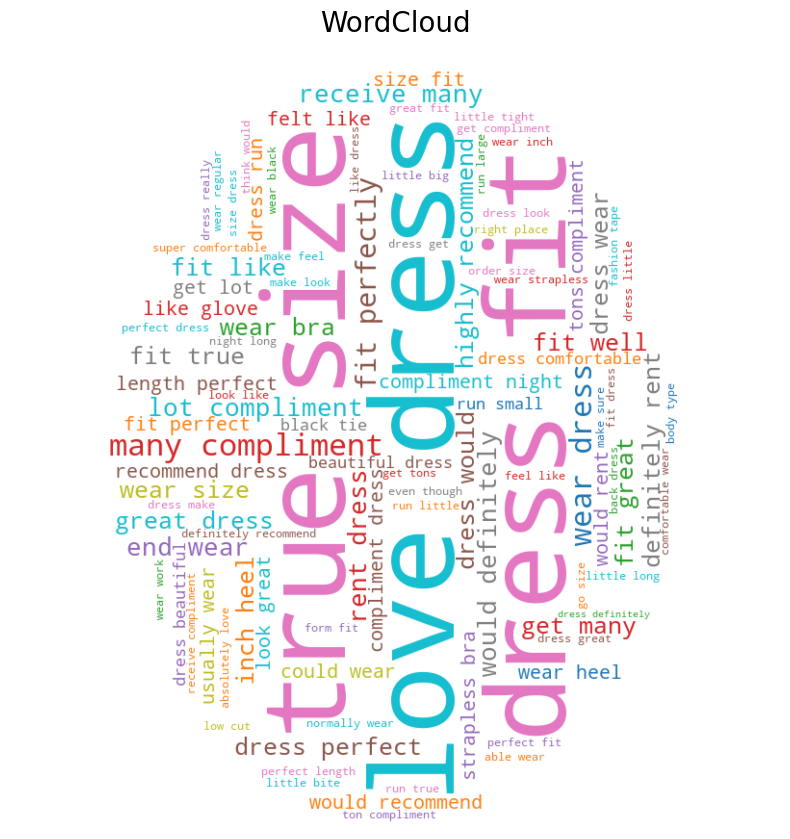

In [ ]:
x, y = np.ogrid[:800, :800]  
center_x, center_y = 400, 400  
radius_x, radius_y = 400, 300  
mask = ((x - center_x) / radius_x) ** 2 + ((y - center_y) / radius_y) ** 2 > 1
mask = 255 * mask.astype(int) 

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    mask=mask,  
    colormap="tab10",  
    prefer_horizontal=0.7, 
    relative_scaling=0.4, 
    max_font_size=120,
    min_font_size=10,
    collocations=False,
    margin=2  
).generate_from_frequencies(word_freq)


plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("WordCloud", fontsize=20, pad=20)
plt.show()

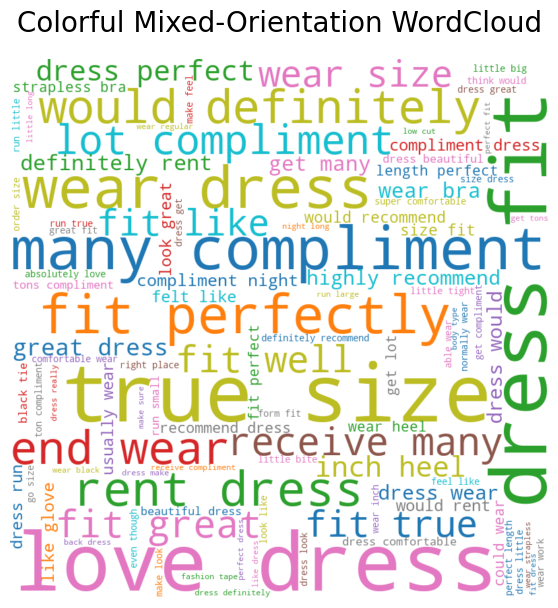

In [ ]:
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",  
    colormap="tab10",  
    prefer_horizontal=0.5, 
    relative_scaling=0.4,  
    max_font_size=120, 
    min_font_size=10,  
    collocations=False,  
    margin=0  
).generate_from_frequencies(word_freq)


plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("Colorful Mixed-Orientation WordCloud", fontsize=20, pad=20)
plt.show()

/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/1689342913.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20c', len(df_unigrams))  # 使用 'tab20c' 调色板，适合较多类别
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/1689342913.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/1689342913.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


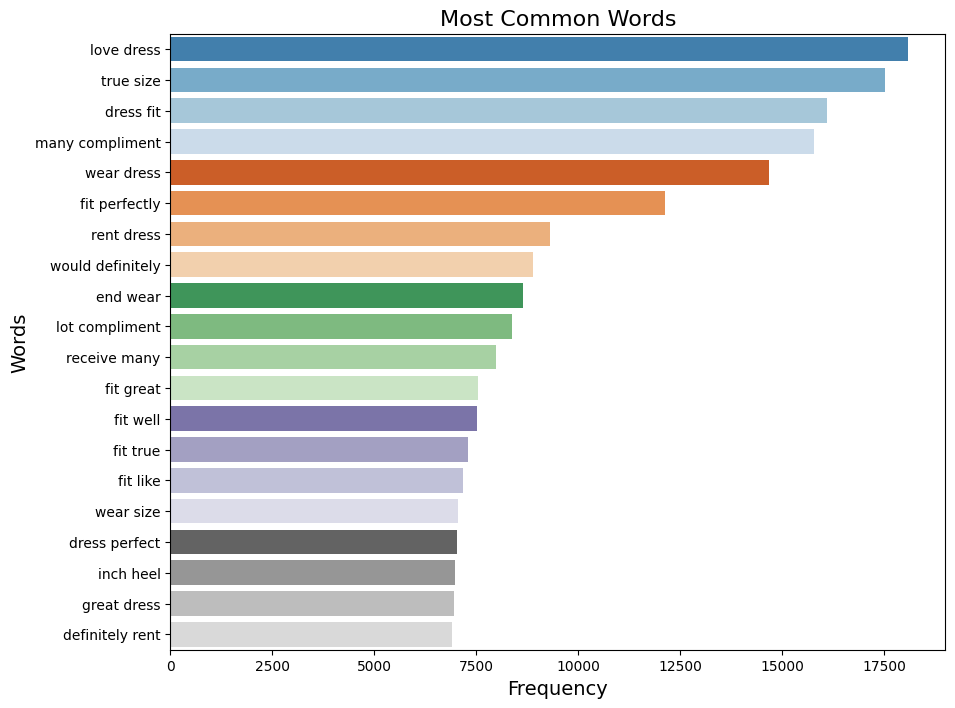

In [ ]:
import matplotlib.cm as cm
import numpy as np

colors = cm.get_cmap('tab20c', len(df_unigrams)) 

plt.figure(figsize=(10, 8))
sns.barplot(
    x="count", 
    y="ngram", 
    data=df_unigrams, 
    palette=colors(np.linspace(0, 1, len(df_unigrams))) 
)
plt.title("Most Common Words", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.show()

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating']) 
df['rating'] = df['rating'].astype(int)

df_low = df[df['rating'] < 6]

df_low

/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/2757461454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(int)


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
42,small,126879,36c,1406963,155lbs,4,wedding,Huge on top and super tight in the waist,pear,strange fit,dress,"5' 4""",28,38,"June 20, 2017"
131,fit,832715,36d,1871026,175lbs,4,work,"Loved the look of this dress on the hanger, bu...",hourglass,"Nice, but not for curves",dress,"5' 7""",24,32,"April 12, 2016"
152,small,898006,38d,135750,NaN,2,wedding,"The dress was much shorter than it appeared, t...",hourglass,Wasn't able to wear,shift,"5' 6""",24,32,"August 19, 2013"
179,fit,483798,36d,1526552,178lbs,4,work,this was not flattering on my curves. Didn't ...,pear,Not cute on an hourglass shape,dress,"5' 7""",24,41,"October 2, 2017"
181,small,979081,32d,1689615,130lbs,2,vacation,So I didn't get a backup of this dress because...,hourglass,Too small-couldn't zip up.,gown,"5' 3""",4,28,"April 22, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192166,fit,733501,36d,782079,NaN,4,formal affair,I rented this dress for a gala and it was noth...,hourglass,"Frumpy, Frumpy, Frumpy",gown,"5' 6""",21,26,"April 3, 2016"
192246,fit,691468,34c,649983,125lbs,4,everyday,"while very soft with a nice casual pattern, th...",full bust,not for my body type,dress,"5' 3""",8,31,"August 21, 2015"
192290,fit,240021,32d,265806,NaN,2,other,Beware if you are bustier. This is not friendl...,athletic,Not friendly to busty women,maxi,"5' 6""",12,30,"July 12, 2017"
192507,fit,813530,34a,1178721,120lbs,4,party,This dress was sent to me when the backup size...,petite,"Fun Dress, But Needs a Certain Body Type",dress,"5' 1""",8,27,"June 22, 2015"


In [355]:
df_low_unigrams = frequent_ngram(df_low['review_text'],2,100)
word_freq_low = dict(zip(df_low_unigrams['ngram'], df_low_unigrams['count']))
df_low_unigrams

,ngram,count
0,end wear,364
1,wear dress,333
2,look like,268
3,make look,225
4,dress fit,221
...,...,...
95,return without,38
96,receive dress,37
97,fit better,37
98,beautiful color,37


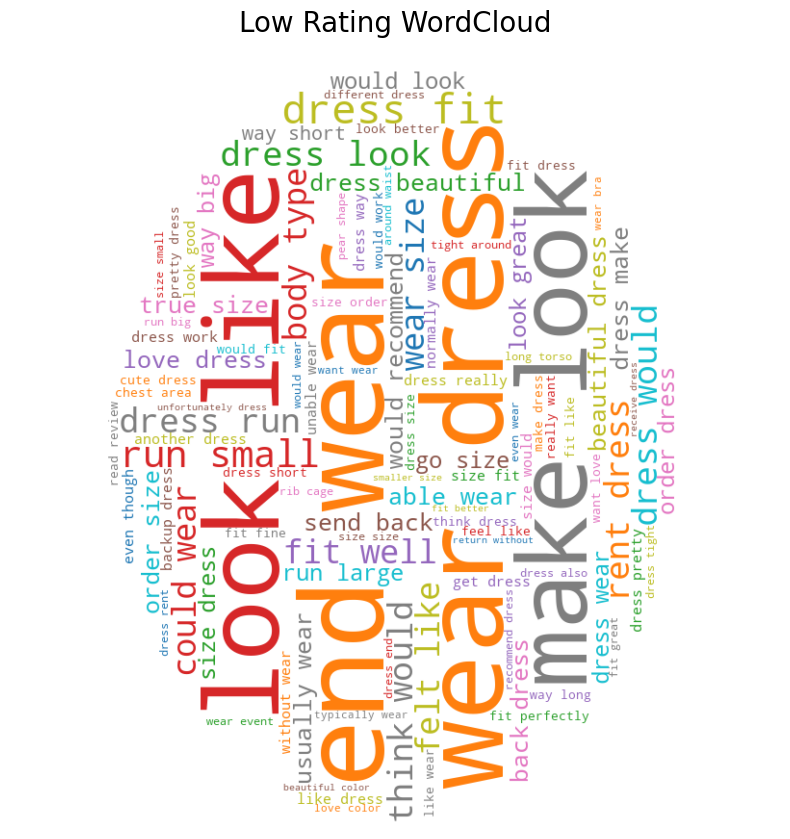

In [385]:
x, y = np.ogrid[:800, :800]  
center_x, center_y = 400, 400  
radius_x, radius_y = 400, 300  
mask = ((x - center_x) / radius_x) ** 2 + ((y - center_y) / radius_y) ** 2 > 1
mask = 255 * mask.astype(int)

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    mask=mask, 
    colormap="tab10",  
    prefer_horizontal=0.7,  
    relative_scaling=0.4, 
    max_font_size=120,
    min_font_size=10,
    collocations=False,
    margin=2  
).generate_from_frequencies(word_freq_low)


plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Low Rating WordCloud", fontsize=20, pad=20)
plt.show()

In [386]:
df_high = df[df['rating'] >= 6]
df_high_unigrams = frequent_ngram(df_high['review_text'],2,100)
word_freq_high = dict(zip(df_high_unigrams['ngram'], df_high_unigrams['count']))
df_high_unigrams

,ngram,count
0,love dress,17979
1,true size,17435
2,dress fit,15866
3,many compliment,15757
4,wear dress,14322
...,...,...
95,like dress,2627
96,make sure,2617
97,dress definitely,2604
98,fit dress,2589


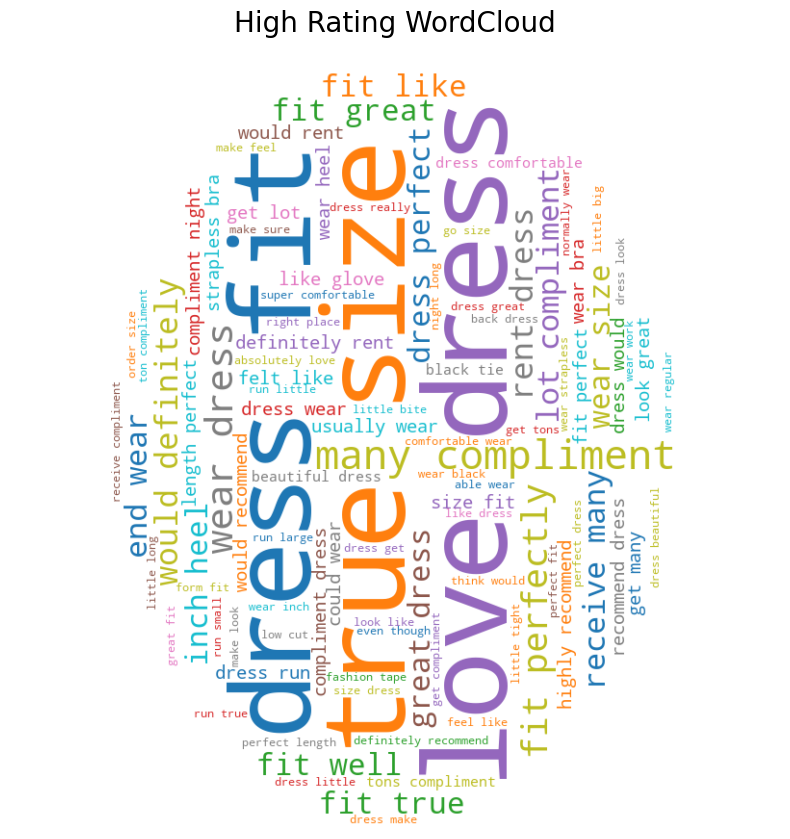

In [387]:
x, y = np.ogrid[:800, :800] 
center_x, center_y = 400, 400  
radius_x, radius_y = 400, 300  
mask = ((x - center_x) / radius_x) ** 2 + ((y - center_y) / radius_y) ** 2 > 1
mask = 255 * mask.astype(int)  

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    mask=mask,  
    colormap="tab10",  
    prefer_horizontal=0.7,  
    relative_scaling=0.4,
    max_font_size=120,
    min_font_size=10,
    collocations=False,
    margin=2  
).generate_from_frequencies(word_freq_high)


plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("High Rating WordCloud", fontsize=20, pad=20)
plt.show()

In [388]:
import nltk
#nltk.download("vader_lexicon") # only need to run this once
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
import pandas as pd

In [389]:
df["score"] = df["review_text"].apply(lambda text: vader.polarity_scores(text))
df["compound"] = df["score"].apply(lambda score_dict: score_dict["compound"])
df

/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/3839702256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["score"] = df["review_text"].apply(lambda text: vader.polarity_scores(text))
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/3839702256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["compound"] = df["score"].apply(lambda score_dict: score_dict["compound"])


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,score,compound
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016","{'neg': 0.023, 'neu': 0.648, 'pos': 0.33, 'com...",0.9453
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013","{'neg': 0.048, 'neu': 0.683, 'pos': 0.268, 'co...",0.8991
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015","{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.9333
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014","{'neg': 0.037, 'neu': 0.727, 'pos': 0.236, 'co...",0.9559
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016","{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.6948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42,"May 18, 2016","{'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'comp...",0.6476
192540,fit,118398,32c,682043,100lbs,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29,"September 30, 2016","{'neg': 0.052, 'neu': 0.74, 'pos': 0.208, 'com...",0.8951
192541,fit,47002,36a,683251,135lbs,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31,"March 4, 2016","{'neg': 0.08, 'neu': 0.776, 'pos': 0.144, 'com...",0.4072
192542,fit,961120,36c,126335,165lbs,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31,"November 25, 2015","{'neg': 0.082, 'neu': 0.663, 'pos': 0.255, 'co...",0.9623


/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/3965256393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_date"] = pd.to_datetime(df["review_date"])
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/3965256393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["review_date"].dt.year
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_62692/3965256393.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singu

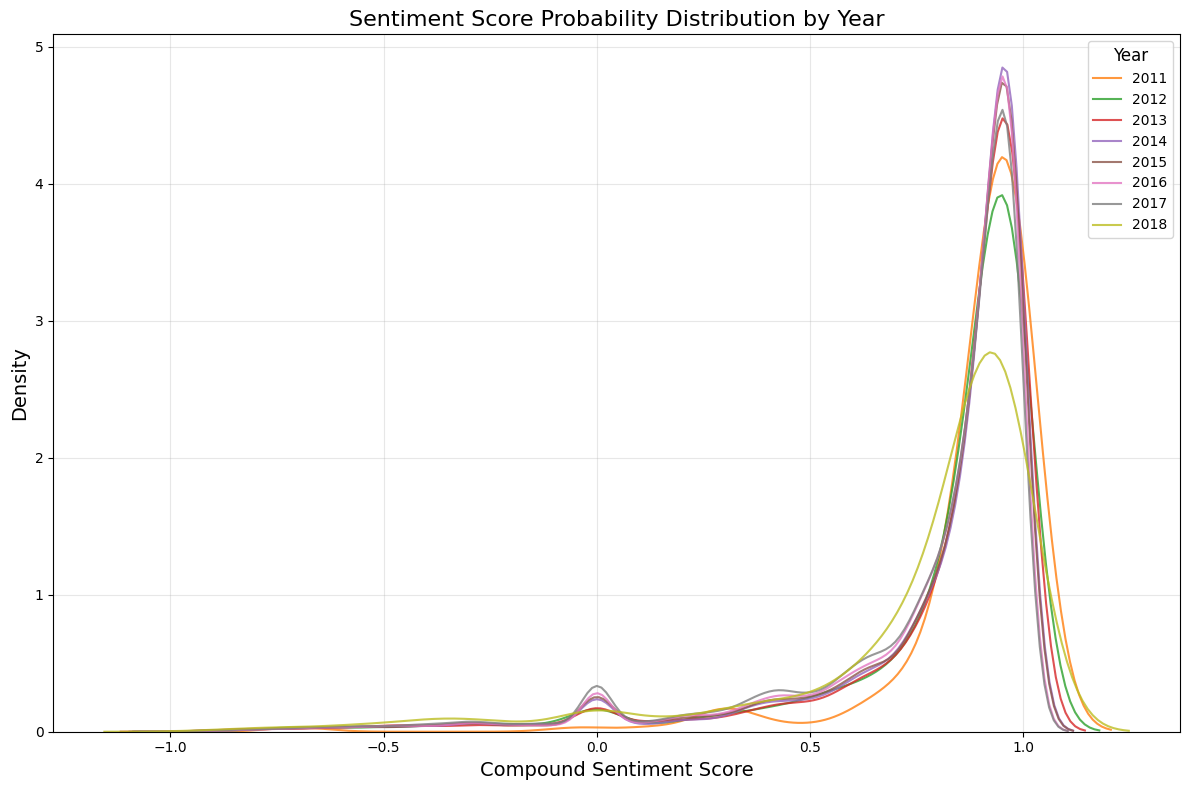

In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["review_date"] = pd.to_datetime(df["review_date"])
df["year"] = df["review_date"].dt.year

plt.figure(figsize=(12, 8))


for year, group in df.groupby("year"):
    sns.kdeplot(
        group["compound"],  
        label=str(year),  
        fill=False,  
        alpha=0.8  
    )


plt.title("Sentiment Score Probability Distribution by Year", fontsize=16)
plt.xlabel("Compound Sentiment Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Year", fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

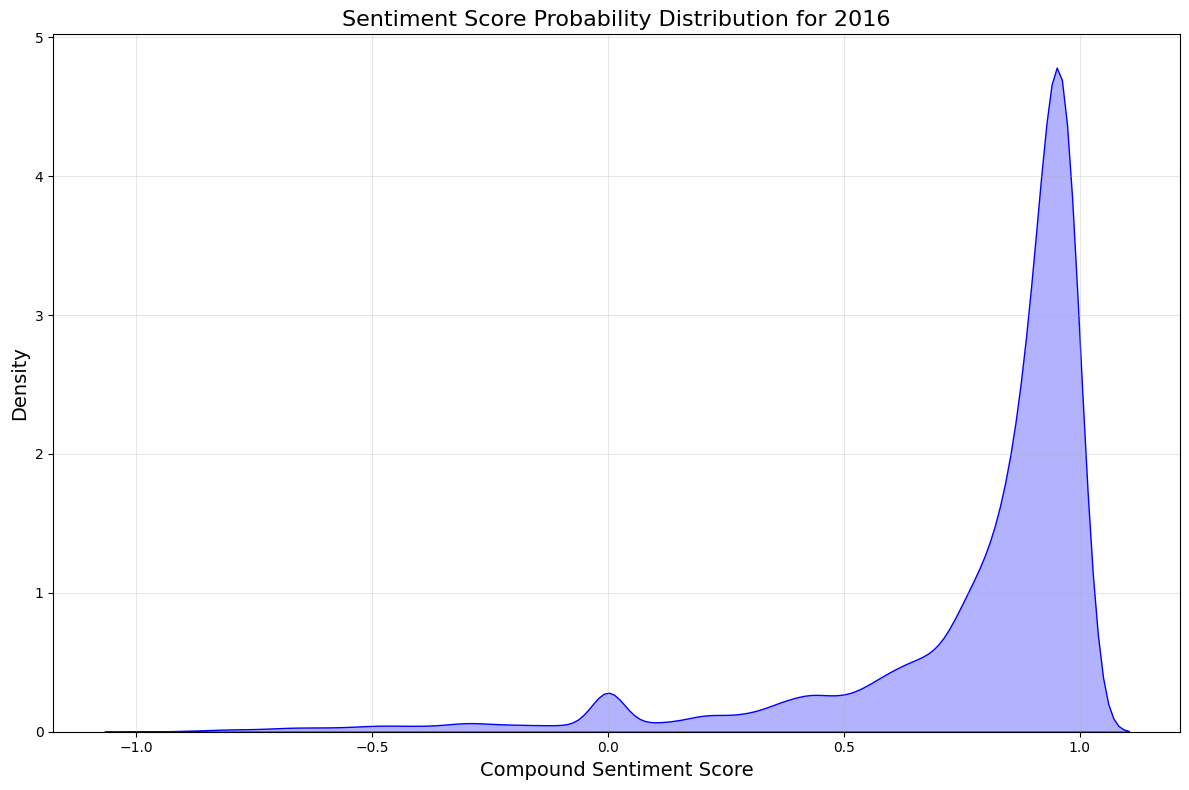

In [391]:
df_2016 = df[df["year"] == 2016]


plt.figure(figsize=(12, 8))


sns.kdeplot(
    df_2016["compound"],  
    fill=True,            
    color="blue",         
    alpha=0.3             
)


plt.title("Sentiment Score Probability Distribution for 2016", fontsize=16)
plt.xlabel("Compound Sentiment Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()